In [82]:
import numpy as np
import os
from matplotlib import pyplot as plt

In [142]:
base = "D:\\ING71_MEC_230309\\AVI\\resultsnpy"
behavior_base = "D:\mec-lec-por-data"
files = os.listdir(base)

def get_experiment_n_day_k(n, k):
    #n is a string ex: '04', '10'
    #k is on the form yymmdd
    base = "D:\\ING71_MEC_" + str(k)
    base = os.path.join(base, 'AVI')
    base = os.path.join(base, 'resultsnpy')


    behavior_base = "D:\mec-lec-por-data"
    files = os.listdir(base)

    experiment_base = 'ING71_MEC_' + str(k) + '_0' + n

    exp_filenames = [file for file in files if file[:20] == experiment_base]

    

    complete_proc = []
    for file in exp_filenames:
        proc = np.load(os.path.join(base, file), allow_pickle=True).item()
        complete_proc.extend(proc['pupil'][0]['area'])

    negative = np.load(os.path.join(behavior_base, experiment_base + '_negative.npy'), allow_pickle=True)
    positive = np.load(os.path.join(behavior_base, experiment_base + '_positive.npy'), allow_pickle=True)
    reward = np.load(os.path.join(behavior_base, experiment_base + '_reward.npy'), allow_pickle=True)
    aversive = np.load(os.path.join(behavior_base, experiment_base + '_aversive.npy'), allow_pickle=True)
    
    return complete_proc, negative, positive, reward, aversive


In [143]:
#proc = np.load("D:\\ING71_MEC_230316\\Behavior Cam\\AVI\\resultsnpy\\ING71_MEC_230316_003_Behav_Fr1-11947_proc.npy", allow_pickle=True).item()

#negative = np.load("D:\\mec-lec-por-data\\ING71_MEC_230316_003_negative.npy", allow_pickle=True)
#positive = np.load("D:\\mec-lec-por-data\\ING71_MEC_230316_003_positive.npy", allow_pickle=True)

In [145]:
c_proc, negative ,positive, reward, aversive = get_experiment_n_day_k('03', 230310)

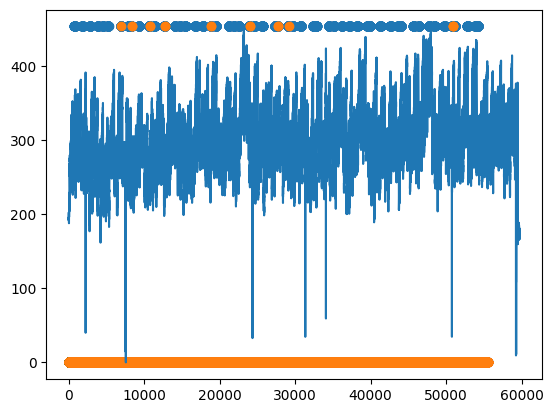

In [148]:
plt.plot(c_proc)
plt.scatter(np.arange(len(negative)),np.array(negative[:])*max(c_proc))
#plt.scatter(np.arange(len(positive)),np.array(positive[:])*max(c_proc))
#plt.scatter(np.arange(len(reward)),np.array(reward[:])*max(c_proc))
plt.scatter(np.arange(len(aversive)),np.array(aversive[:])*max(c_proc))
np.argmin(c_proc)
plt.show()